In [1]:
#textblob for sentiment scores
import textblob   
import pandas as pd

import csv
import time
import requests
from requests import get
from bs4 import BeautifulSoup

from time import sleep
from random import randint
import numpy as np     
#from time import time
import matplotlib.pyplot as plt

#vadar sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


%matplotlib inline

headers = {"Accept-Language": "en-US, en;q=0.5"}


In [3]:
dfarticles=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2018Posts/November/MarketSentiment/Main/MarketSentiment_Analysis/df_articles.csv')
dfarticles

,Unnamed: 0,text_body,date_original,Date,Day,Month,Year,Time
0,0,washington (reuters) - the u.s. military has n...,"August 28, 2018 / 12:21 AM / 2 months ago",28/08/2018,28,8,2018,12:21 AM
1,1,"u.s. crude futures extend losses, down by more...","February 28, 2018 / 4:17 PM / 8 months ago",28/02/2018,28,2,2018,4:17 PM
2,2,"juba, oct 31 (reuters) - south sudan’s preside...","October 31, 2018 / 2:44 PM / 8 days ago",31/10/2018,31,10,2018,2:44 PM
3,3,berlin/munich (reuters) - audi has discovered ...,"May 8, 2018 / 12:06 PM / 6 months ago",08/05/2018,8,5,2018,12:06 PM
4,4,zarif says iran stands firm against u.s. bully...,"May 3, 2018 / 11:37 AM / 6 months ago",03/05/2018,3,5,2018,11:37 AM
5,5,investigators and members of emergencies servi...,"June 16, 2018 / 6:05 PM / 5 months ago",16/06/2018,16,6,2018,6:05 PM
6,6,ankara (reuters) - the top adviser to iran’s s...,"February 1, 2018 / 8:37 AM / 9 months ago",01/02/2018,1,2,2018,8:37 AM
7,7,"manila (reuters) - ac energy inc, part of phil...","May 21, 2018 / 8:04 AM / 6 months ago",21/05/2018,21,5,2018,8:04 AM
8,8,"beijing, aug 23 (reuters) - * china’s july exp...","August 23, 2018 / 5:33 AM / 3 months ago",23/08/2018,23,8,2018,5:33 AM
9,9,(repeats may 3 story with no changes) * “polit...,"May 4, 2018 / 10:39 AM / 6 months ago",04/05/2018,4,5,2018,10:39 AM


In [4]:
from textblob import TextBlob
import re

#first I want to compare textblob inbuild sentiment analysis
#here defining functions to clean the text

def clean_text(text):
    '''
    function to clean the text by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())


#this computes the sentiment polarity

def analyze_text_polarity(text):
   
    analysis = TextBlob(clean_text(text))
    return analysis.sentiment.polarity
    
    
#analyze_text computers the sentiment of each article
#then assigns a value depending on the polarity range it sits in
def analyze_text(text):
    
    
    #The bottom 25% of sentiment is -0.017
    #The top 25% of sentiment is 0.08
    
    analysis = TextBlob(clean_text(text))
    if analysis.sentiment.polarity > 0.08:
        return 1
    elif analysis.sentiment.polarity < -0.017:
        return -1
    else:
        return 0
  



In [5]:
import re

def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText)
    return theTokens


#the calculator counts number of +ve and -ve words
#it then assigns a value depending on the polarity
def calculator(text):
    # Count positive words
    numPosWords = 0
    cleantext = tokenizer((text))
    #cleantext = clean_text(text)
    for word in cleantext:
        if word in positive_words:
            numPosWords += 1
            
    # Count negative words
    numNegWords = 0
    for word in cleantext:
        if word in negative_words:
            numNegWords += 1
    
    sum = (numPosWords - numNegWords)
    return sum



In [6]:
#this is a dictionary of manually curated negative and positive words
dfoil=pd.read_csv('dict.csv')

positive_words=dfoil[dfoil["Sentiment"]=="positive"]['Word'].values
negative_words=dfoil[dfoil["Sentiment"]=="negative"]['Word'].values

print(negative_words[-10:])

['upgrade' 'upgraded' 'upgrades' 'violations' 'warned' 'warning'
 'warning letter' 'weak' 'whacked' 'worse than expected']


In [7]:
# Compute sentiment score given dictionary
dfarticles['dict_sentiment'] = np.array([calculator(text) for text in dfarticles['text_body'] ])
dfarticles['dict_sentiment']

0       -3
1        0
2        0
3        0
4        0
5        0
6        1
7        0
8        0
9       -5
10       0
11      -3
12       0
13       0
14       4
15       0
16       5
17      -4
18       0
19      -1
20       2
21       0
22      -2
23       0
24      -1
25       1
26       6
27      -5
28      -1
29       2
        ..
1997     0
1998     1
1999     0
2000     1
2001     0
2002     1
2003     0
2004     3
2005     0
2006     1
2007     1
2008     1
2009     3
2010    -1
2011    -6
2012     2
2013     3
2014    -2
2015    -1
2016     0
2017     0
2018     0
2019     0
2020     0
2021    -1
2022    -1
2023     0
2024     1
2025     2
2026   -12
Name: dict_sentiment, Length: 2027, dtype: int64

In [8]:
# Compute sentiment score given textblob sentiment polarity
dfarticles['sentiment_polarity'] = np.array([ analyze_text_polarity(text) for text in dfarticles['text_body'] ])
dfarticles['sentiment_polarity']

0       0.053285
1      -0.088889
2       0.000000
3       0.041296
4      -0.200000
5      -0.028571
6       0.046049
7       0.061842
8       0.100000
9       0.051560
10      0.018042
11      0.097386
12      0.136364
13      0.097727
14      0.100477
15      0.100000
16      0.060293
17      0.064226
18     -0.387500
19      0.038889
20      0.080173
21      0.010590
22     -0.030273
23      0.089286
24     -0.024074
25      0.127778
26      0.100699
27      0.075724
28      0.128852
29      0.146074
          ...   
1997    0.101496
1998    0.007197
1999    0.000000
2000   -0.002727
2001   -0.079315
2002    0.098232
2003   -0.076923
2004    0.100621
2005    0.000000
2006   -0.004215
2007    0.082374
2008   -0.066364
2009    0.099085
2010    0.104399
2011    0.072982
2012    0.008425
2013    0.048668
2014   -0.021726
2015    0.002344
2016    0.000000
2017    0.036135
2018    0.051786
2019   -0.062500
2020   -0.052867
2021    0.064619
2022    0.017130
2023    0.040265
2024    0.0410

In [9]:
# Compute sentiment score given textblob sentiment (binary)
dfarticles['sentiment'] = np.array([ analyze_text(text) for text in dfarticles['text_body'] ])
dfarticles['sentiment']

0       0
1      -1
2       0
3       0
4      -1
5      -1
6       0
7       0
8       1
9       0
10      0
11      1
12      1
13      1
14      1
15      1
16      0
17      0
18     -1
19      0
20      1
21      0
22     -1
23      1
24     -1
25      1
26      1
27      0
28      1
29      1
       ..
1997    1
1998    0
1999    0
2000    0
2001   -1
2002    1
2003   -1
2004    1
2005    0
2006    0
2007    1
2008   -1
2009    1
2010    1
2011    0
2012    0
2013    0
2014   -1
2015    0
2016    0
2017    0
2018    0
2019   -1
2020   -1
2021    0
2022    0
2023    0
2024    0
2025    1
2026   -1
Name: sentiment, Length: 2027, dtype: int64

In [10]:
#vadar sentiment analysis

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

import re

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)['compound']
    return score


#analyze_text computers the sentiment of each article
#then assigns a value depending on the polarity range it sits in
def analyze_VADAR_text(sentence):
    
    #analyzer = SentimentIntensityAnalyzer(text)
    
    
    
    #The bottom 25% of sentiment is -0.680800
    #The top 25% of sentiment is  0.947800

    
    #analysis = TextBlob(clean_text(text))
    if analyser.polarity_scores(sentence)['compound']>  0.947800:
        return 1
    elif analyser.polarity_scores(sentence)['compound'] < -0.680800:
        return -1
    else:
        return 0
  


In [13]:
# Compute sentiment score given vadar
dfarticles['vadar_polarity'] = np.array([ sentiment_analyzer_scores(text) for text in dfarticles['text_body'] ])
dfarticles['vadar_polarity']

0      -0.9967
1      -0.5423
2       0.8020
3      -0.8934
4      -0.1531
5       0.1027
6      -0.9261
7       0.9793
8       0.6597
9       0.9975
10     -0.9877
11      0.9951
12      0.5267
13     -0.9790
14      0.9194
15      0.7650
16      0.9862
17      0.9616
18     -0.6249
19     -0.3818
20      0.9848
21      0.9246
22     -0.6643
23      0.7579
24     -0.5017
25      0.8834
26      0.8500
27     -0.7311
28      0.9403
29      0.9960
         ...  
1997    0.9814
1998    0.8765
1999    0.2732
2000    0.5106
2001   -0.7915
2002    0.9754
2003    0.8481
2004    0.9980
2005    0.2263
2006    0.5574
2007    0.5984
2008   -0.9272
2009    0.9558
2010    0.9878
2011    0.4760
2012    0.5789
2013    0.4939
2014    0.3609
2015   -0.9773
2016    0.7506
2017    0.7717
2018    0.9468
2019   -0.1779
2020   -0.9818
2021    0.9790
2022   -0.9704
2023    0.9288
2024    0.7615
2025    0.9708
2026   -0.9847
Name: vadar_polarity, Length: 2027, dtype: float64

In [16]:
#compute vadar index where I adjust to ignore 25% percentile subsets
dfarticles['vadar_index'] = np.array([ analyze_VADAR_text(text) for text in dfarticles['text_body'] ])
dfarticles['vadar_index']

0      -1
1       0
2       0
3      -1
4       0
5       0
6      -1
7       1
8       0
9       1
10     -1
11      1
12      0
13     -1
14      0
15      0
16      1
17      1
18      0
19      0
20      1
21      0
22      0
23      0
24      0
25      0
26      0
27     -1
28      0
29      1
       ..
1997    1
1998    0
1999    0
2000    0
2001   -1
2002    1
2003    0
2004    1
2005    0
2006    0
2007    0
2008   -1
2009    1
2010    1
2011    0
2012    0
2013    0
2014    0
2015   -1
2016    0
2017    0
2018    0
2019    0
2020   -1
2021    1
2022   -1
2023    0
2024    0
2025    1
2026   -1
Name: vadar_index, Length: 2027, dtype: int64

In [17]:
dfarticles.to_csv('sentiment_analysis.csv')

In [19]:
dfsentiment=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2018Posts/November/MarketSentiment/Main/MarketSentiment_Analysis/sentiment_analysis.csv')
dfsentiment

,Unnamed: 0,Unnamed: 0.1,text_body,date_original,Date,Day,Month,Year,Time,dict_sentiment,sentiment_polarity,sentiment,vadar_polarity,vadar_index
0,0,0,washington (reuters) - the u.s. military has n...,"August 28, 2018 / 12:21 AM / 2 months ago",28/08/2018,28,8,2018,12:21 AM,-3,0.053285,0,-0.9967,-1
1,1,1,"u.s. crude futures extend losses, down by more...","February 28, 2018 / 4:17 PM / 8 months ago",28/02/2018,28,2,2018,4:17 PM,0,-0.088889,-1,-0.5423,0
2,2,2,"juba, oct 31 (reuters) - south sudan’s preside...","October 31, 2018 / 2:44 PM / 8 days ago",31/10/2018,31,10,2018,2:44 PM,0,0.000000,0,0.8020,0
3,3,3,berlin/munich (reuters) - audi has discovered ...,"May 8, 2018 / 12:06 PM / 6 months ago",08/05/2018,8,5,2018,12:06 PM,0,0.041296,0,-0.8934,-1
4,4,4,zarif says iran stands firm against u.s. bully...,"May 3, 2018 / 11:37 AM / 6 months ago",03/05/2018,3,5,2018,11:37 AM,0,-0.200000,-1,-0.1531,0
5,5,5,investigators and members of emergencies servi...,"June 16, 2018 / 6:05 PM / 5 months ago",16/06/2018,16,6,2018,6:05 PM,0,-0.028571,-1,0.1027,0
6,6,6,ankara (reuters) - the top adviser to iran’s s...,"February 1, 2018 / 8:37 AM / 9 months ago",01/02/2018,1,2,2018,8:37 AM,1,0.046049,0,-0.9261,-1
7,7,7,"manila (reuters) - ac energy inc, part of phil...","May 21, 2018 / 8:04 AM / 6 months ago",21/05/2018,21,5,2018,8:04 AM,0,0.061842,0,0.9793,1
8,8,8,"beijing, aug 23 (reuters) - * china’s july exp...","August 23, 2018 / 5:33 AM / 3 months ago",23/08/2018,23,8,2018,5:33 AM,0,0.100000,1,0.6597,0
9,9,9,(repeats may 3 story with no changes) * “polit...,"May 4, 2018 / 10:39 AM / 6 months ago",04/05/2018,4,5,2018,10:39 AM,-5,0.051560,0,0.9975,1


In [20]:
df_daily=dfsentiment.groupby(['Date'], as_index=True).mean()
df_daily

,Unnamed: 0,Unnamed: 0.1,Day,Month,Year,dict_sentiment,sentiment_polarity,sentiment,vadar_polarity,vadar_index
Date,,,,,,,,,,
01/01/2018,1393.000000,1393.000000,1.0,1.0,2018.0,0.000000,-0.125000,-1.000000,0.153100,0.000000
01/02/2018,1011.400000,1011.400000,1.0,2.0,2018.0,2.200000,0.074933,0.500000,0.541730,0.100000
01/03/2018,1150.000000,1150.000000,1.0,3.0,2018.0,0.153846,-0.025291,-0.384615,-0.104900,-0.307692
01/04/2018,1195.500000,1195.500000,1.0,4.0,2018.0,0.500000,0.020904,0.000000,0.715350,0.000000
01/05/2018,1313.153846,1313.153846,1.0,5.0,2018.0,0.846154,0.029695,0.153846,0.433846,0.076923
01/06/2018,1153.916667,1153.916667,1.0,6.0,2018.0,1.166667,0.068894,0.166667,0.248017,0.250000
01/07/2018,530.000000,530.000000,1.0,7.0,2018.0,0.000000,-0.096293,-1.000000,-0.834650,-0.500000
01/08/2018,784.250000,784.250000,1.0,8.0,2018.0,1.750000,0.099763,0.500000,0.810850,0.000000
01/09/2018,1853.500000,1853.500000,1.0,9.0,2018.0,0.000000,0.038708,0.000000,-0.047000,-0.500000


In [21]:
df_daily.to_csv('mean_scores.csv')

In [44]:
#at this point I have added front month brent 
#to the df_daily csv file to create the brent csv

dfbrent=pd.read_csv('/Users/neilwatt/Documents/BIs/PrWeb/2018Posts/November/MarketSentiment/Main/MarketSentiment_Analysis/brent.csv')

dfbrent["Date"]=dfbrent["Date"].astype('datetime64[ns]') # Convert column to date format

dfbrent['5_MA_sentiment'] = dfbrent['sentiment'].rolling(window=5).mean()
dfbrent['10_MA_sentiment'] = dfbrent['sentiment'].rolling(window=10).mean()
dfbrent['30_MA_sentiment'] = dfbrent['sentiment'].rolling(window=30).mean()
dfbrent['10_MA_vadar'] = dfbrent['vadar_polarity'].rolling(window=10).mean()
dfbrent['30_MA_vadar'] = dfbrent['vadar_polarity'].rolling(window=30).mean()

dfbrent['10_MA_vadar_index'] = dfbrent['vadar_index'].rolling(window=10).mean()
dfbrent['30_MA_vadar_index'] = dfbrent['vadar_index'].rolling(window=30).mean()

dfbrent2=dfbrent.dropna()


In [39]:
#we find a negative correlation between vadar sentiment 
#and bren
np.corrcoef(dfbrent2['30_MA_vadar'], dfbrent2["Brent"])


array([[ 1.        , -0.34663299],
       [-0.34663299,  1.        ]])

In [40]:
#we find a negative correlation between dictionary sentiment
#-0.15 let's ignore
np.corrcoef(dfbrent2['dict_sentiment'], dfbrent2["Brent"])




array([[ 1.        , -0.15391651],
       [-0.15391651,  1.        ]])

In [23]:
#negligible correlation with sentiment polarity
np.corrcoef(dfbrent2['sentiment_polarity'], dfbrent2["Brent"])


array([[1.       , 0.0155456],
       [0.0155456, 1.       ]])

In [24]:
#small correlation with sentiment
np.corrcoef(dfbrent2['sentiment'], dfbrent2["Brent"])

array([[1.        , 0.06955099],
       [0.06955099, 1.        ]])

In [26]:
#0.4 correlation between 30 day MA sentiment
np.corrcoef(dfbrent2['30_MA_sentiment'], dfbrent2["Brent"])

array([[1.      , 0.395449],
       [0.395449, 1.      ]])

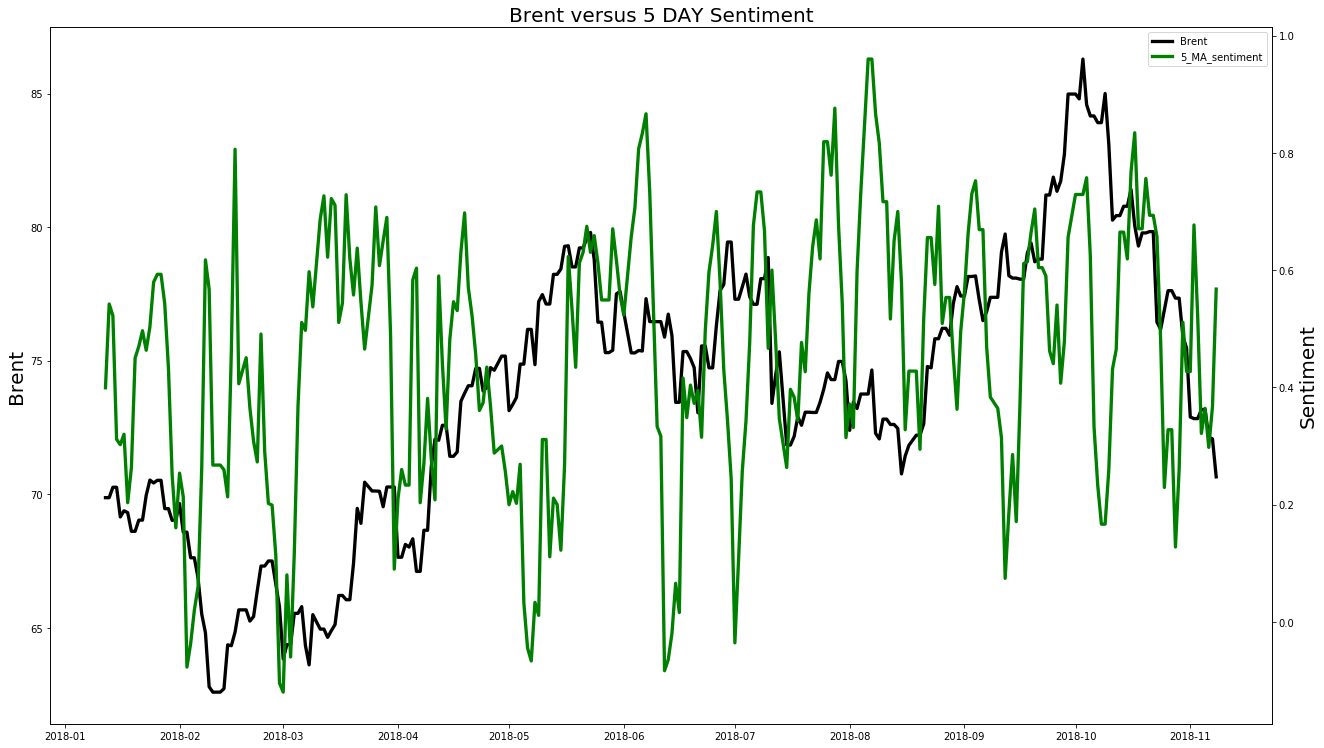

In [8]:
#plot 3 MA against Brent

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()


ax1.plot(dfbrent2['Date'].astype('O'),  dfbrent2["Brent"], color='black', linewidth=3.3)
ax1.set_xlabel('')
# Make the y-axis label, ticks and tick labels match the line color.

ax1.set_ylabel('Brent', color='black', fontsize=20)
ax1.tick_params('y', colors='black')

ax2 = ax1.twinx()


ax2.plot(dfbrent2['Date'].astype('O'),  dfbrent2['5_MA_sentiment'],'green', linewidth=3.3)
ax2.set_ylabel('Sentiment', color='black', fontsize=20)
ax2.tick_params('y', colors='black')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
plt.title('Brent versus 5 DAY Sentiment', fontsize=20)


#add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.tight_layout()
plt.savefig('Brent versus 5 DAY MA Sentiment.png')

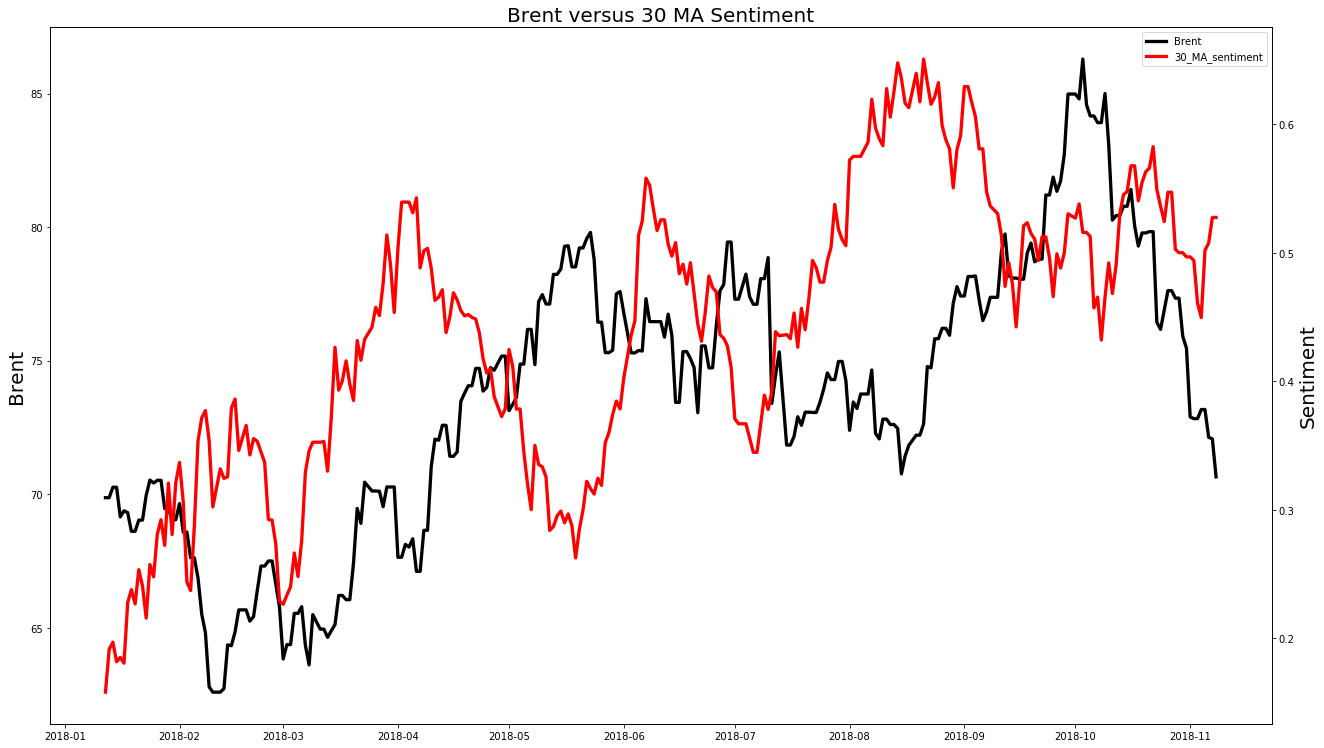

In [42]:
#plot 30 MA against Brent

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()


ax1.plot(dfbrent2['Date'].astype('O'),  dfbrent2["Brent"], color='black', linewidth=3.3)
ax1.set_xlabel('')
# Make the y-axis label, ticks and tick labels match the line color.

ax1.set_ylabel('Brent', color='black', fontsize=20)
ax1.tick_params('y', colors='black')

ax2 = ax1.twinx()


ax2.plot(dfbrent2['Date'].astype('O'),  dfbrent2['30_MA_sentiment'],'red', linewidth=3.3)
ax2.set_ylabel('Sentiment', color='black', fontsize=20)
ax2.tick_params('y', colors='black')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
plt.title('Brent versus 30 MA Sentiment', fontsize=20)


#add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.tight_layout()
plt.savefig('Brent versus 30 MA Sentiment.png')

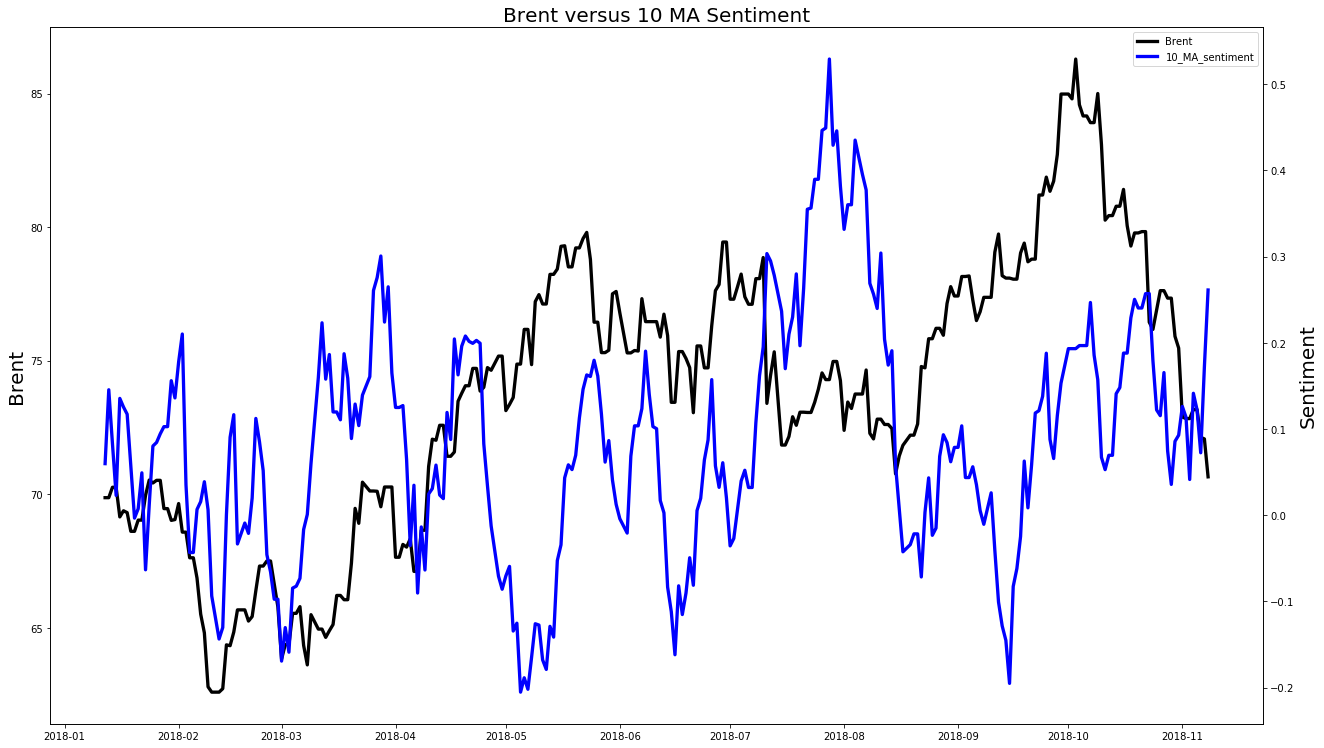

In [45]:
#plot 10 MA against Brent
import numpy as np
import matplotlib.pyplot as plt

fig, ax3 = plt.subplots()


ax3.plot(dfbrent2['Date'].astype('O'),  dfbrent2["Brent"], color='black', linewidth=3.3)
ax3.set_xlabel('')
# Make the y-axis label, ticks and tick labels match the line color.

ax3.set_ylabel('Brent', color='black', fontsize=20)
ax3.tick_params('y', colors='black')

ax4 = ax3.twinx()
#ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1))

ax4.plot(dfbrent2['Date'].astype('O'),  dfbrent2['10_MA_sentiment'],'blue', linewidth=3.3)

ax4.set_ylabel('Sentiment', color='black', fontsize=20)
ax4.tick_params('y', colors='black')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
plt.title('Brent versus 10 MA Sentiment', fontsize=20)


#add legend
lines, labels = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax4.legend(lines + lines2, labels + labels2, loc=0)
plt.tight_layout()
plt.savefig('Brent versus 10 MA Sentiment.png')



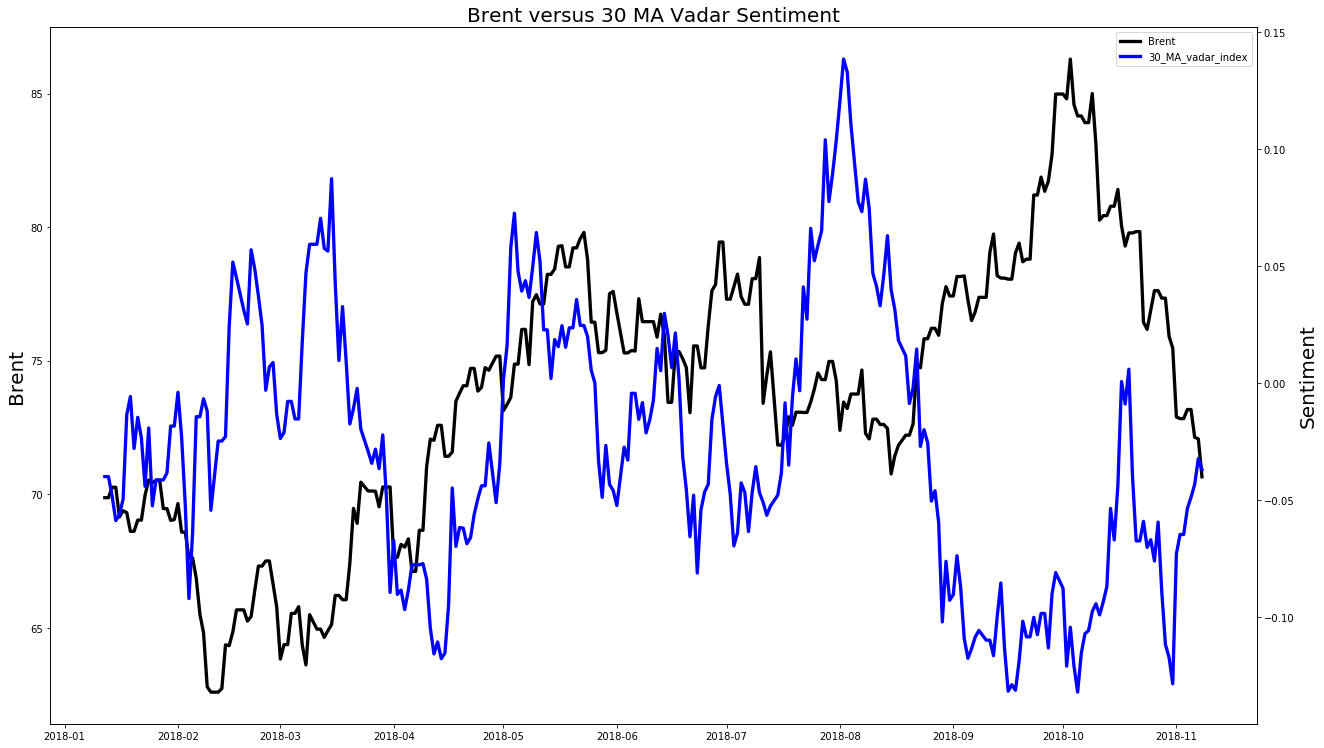

In [46]:
#out of curiosity let's see if vadar offers any meaning 
#plot 10 MA against Brent
import numpy as np
import matplotlib.pyplot as plt

fig, ax3 = plt.subplots()


ax3.plot(dfbrent2['Date'].astype('O'),  dfbrent2["Brent"], color='black', linewidth=3.3)
ax3.set_xlabel('')
# Make the y-axis label, ticks and tick labels match the line color.

ax3.set_ylabel('Brent', color='black', fontsize=20)
ax3.tick_params('y', colors='black')

ax4 = ax3.twinx()
#ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1))

ax4.plot(dfbrent2['Date'].astype('O'),  dfbrent2['30_MA_vadar_index'],'blue', linewidth=3.3)

ax4.set_ylabel('Sentiment', color='black', fontsize=20)
ax4.tick_params('y', colors='black')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
plt.title('Brent versus 30 MA Vadar Sentiment', fontsize=20)


#add legend
lines, labels = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax4.legend(lines + lines2, labels + labels2, loc=0)
plt.tight_layout()
#plt.savefig('Brent versus 10 MA Sentiment.png')

